In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

In [2]:
file_path = r"D:\ML_Project\Data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-06-09,Kolkata,Banglore,16:50:00,05:35:00,765,2.0,No Info,11642
1,Goair,2019-06-15,Banglore,Delhi,20:55:00,23:40:00,165,0.0,No Info,3898
2,Multiple Carriers,2019-03-21,Delhi,Cochin,10:00:00,21:00:00,660,1.0,In-flight meal not included,8085
3,Jet Airways,2019-05-09,Delhi,Cochin,05:30:00,04:25:00,1375,2.0,In-flight meal not included,13029
4,Indigo,2019-04-18,Kolkata,Banglore,21:25:00,00:05:00,160,0.0,No Info,4174
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-05-15,Delhi,Cochin,13:00:00,19:15:00,375,1.0,No Info,8372
636,Multiple Carriers,2019-06-06,Delhi,Cochin,08:00:00,19:15:00,675,1.0,No Info,14848
637,Multiple Carriers,2019-05-01,Delhi,Cochin,09:00:00,19:15:00,615,1.0,No Info,15373
638,Vistara,2019-06-06,Banglore,Delhi,19:30:00,22:15:00,165,0.0,No Info,5088


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [5]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-06-09,Kolkata,Banglore,2025-03-21 16:50:00,2025-03-21 05:35:00,765,2.0,No Info,11642
1,Goair,2019-06-15,Banglore,Delhi,2025-03-21 20:55:00,2025-03-21 23:40:00,165,0.0,No Info,3898
2,Multiple Carriers,2019-03-21,Delhi,Cochin,2025-03-21 10:00:00,2025-03-21 21:00:00,660,1.0,In-flight meal not included,8085
3,Jet Airways,2019-05-09,Delhi,Cochin,2025-03-21 05:30:00,2025-03-21 04:25:00,1375,2.0,In-flight meal not included,13029
4,Indigo,2019-04-18,Kolkata,Banglore,2025-03-21 21:25:00,2025-03-21 00:05:00,160,0.0,No Info,4174
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-05-15,Delhi,Cochin,2025-03-21 13:00:00,2025-03-21 19:15:00,375,1.0,No Info,8372
636,Multiple Carriers,2019-06-06,Delhi,Cochin,2025-03-21 08:00:00,2025-03-21 19:15:00,675,1.0,No Info,14848
637,Multiple Carriers,2019-05-01,Delhi,Cochin,2025-03-21 09:00:00,2025-03-21 19:15:00,615,1.0,No Info,15373
638,Vistara,2019-06-06,Banglore,Delhi,2025-03-21 19:30:00,2025-03-21 22:15:00,165,0.0,No Info,5088


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      639 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,639.000000,640.000000
mean,633.664062,0.815336,8935.495312
std,516.300768,0.697296,4432.205603
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5014.500000
50%,505.000000,1.000000,8366.000000
75%,910.000000,1.000000,12263.750000
max,2420.000000,3.000000,28322.000000


In [8]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")                                           #describe for categorical
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,639.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,208,266,266,322.0,521


In [9]:
train=train.assign(total_stops=train.total_stops.fillna(0))

In [10]:
eda_helper_functions.missing_info(train)                         #High level analysis of missing data

,count,percentage
variable,,


<h3>Isolation Forest is a ensemble technique. <br>
It takes a feature randomly, a value randomly and makes a split based on this. <br>A tree forms similar to decision tree. <br>Outlier data point will be different from other points. <br>This is captured in the starting splits itself, i.e, isolated.
</h3>

In [11]:
forest = IsolationForest(n_estimators=10, random_state=42)
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")                               #query used to filter something in our dataframe
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Air India,2019-06-09,Kolkata,Banglore,2025-03-21 16:50:00,2025-03-21 05:35:00,765,2.0,No Info,11642,-1
3,Jet Airways,2019-05-09,Delhi,Cochin,2025-03-21 05:30:00,2025-03-21 04:25:00,1375,2.0,In-flight meal not included,13029,-1
5,Spicejet,2019-06-24,Chennai,Kolkata,2025-03-21 08:20:00,2025-03-21 10:35:00,135,0.0,No check-in baggage included,3543,-1
6,Jet Airways,2019-03-09,Delhi,Cochin,2025-03-21 05:40:00,2025-03-21 04:25:00,1365,2.0,No Info,14861,-1
9,Air India,2019-06-18,Mumbai,Hyderabad,2025-03-21 13:55:00,2025-03-21 15:25:00,90,0.0,No Info,3100,-1
...,...,...,...,...,...,...,...,...,...,...,...
624,Air India,2019-03-09,Delhi,Cochin,2025-03-21 10:55:00,2025-03-21 19:15:00,1940,2.0,No Info,17476,-1
627,Jet Airways,2019-03-09,Delhi,Cochin,2025-03-21 17:25:00,2025-03-21 18:50:00,1525,1.0,In-flight meal not included,14053,-1
628,Jet Airways,2019-05-09,Delhi,Cochin,2025-03-21 23:05:00,2025-03-21 04:25:00,1760,2.0,No Info,15129,-1
631,Spicejet,2019-06-27,Mumbai,Hyderabad,2025-03-21 13:15:00,2025-03-21 14:45:00,90,0.0,No Info,2017,-1


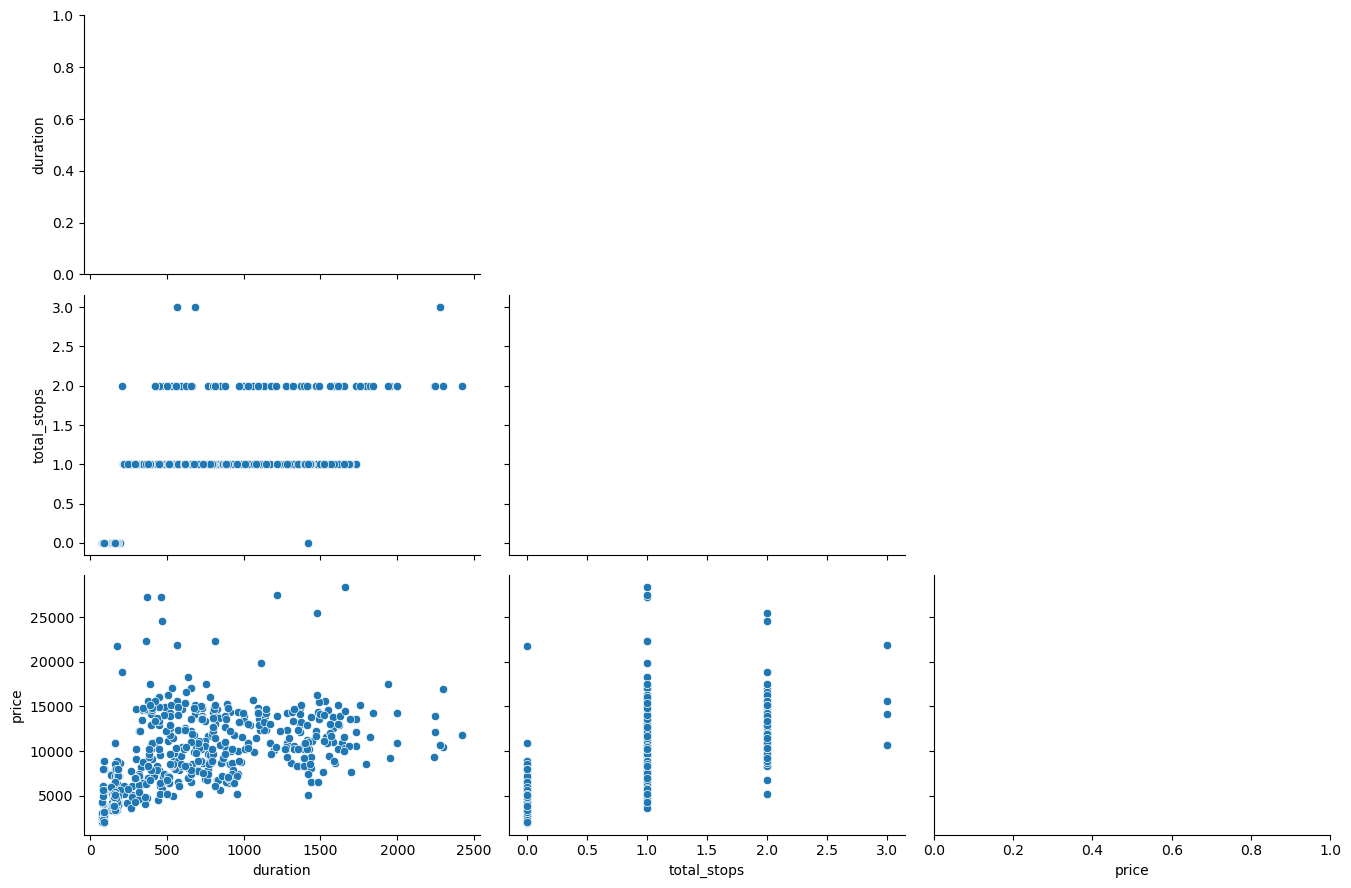

In [12]:
eda_helper_functions.pair_plots(train)

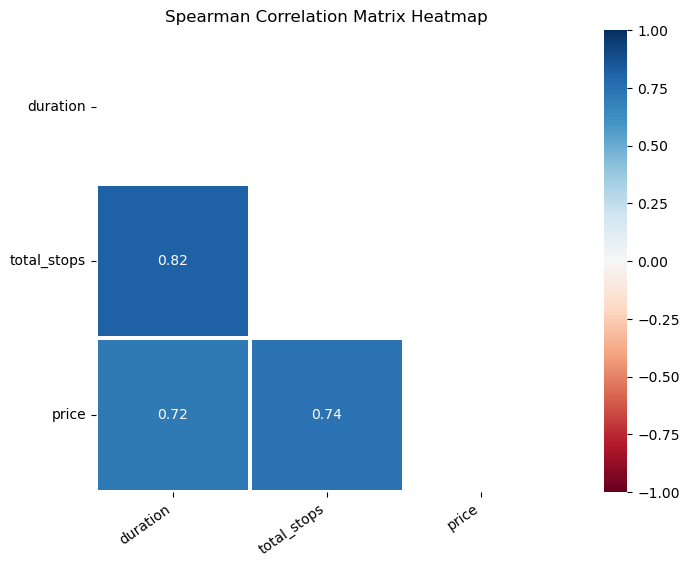

In [13]:
eda_helper_functions.correlation_heatmap(train)

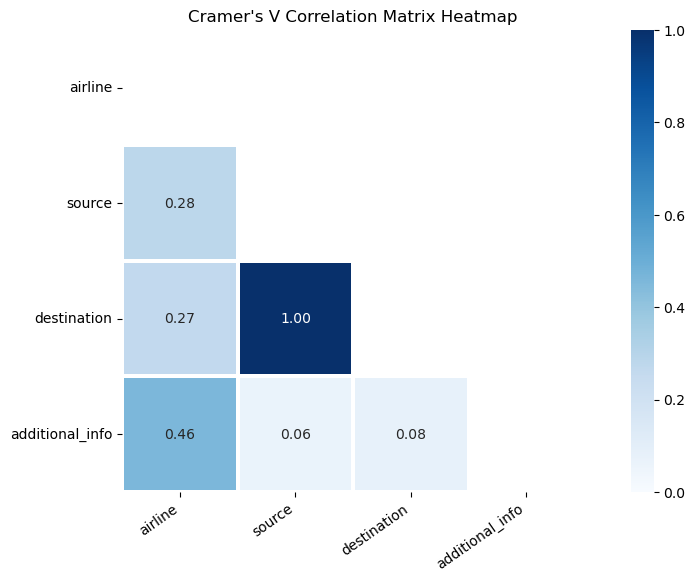

In [14]:
eda_helper_functions.cramersV_heatmap(train)

In [15]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [16]:
train.airline

0              Air India
1                  Goair
2      Multiple Carriers
3            Jet Airways
4                 Indigo
             ...        
635            Air India
636    Multiple Carriers
637    Multiple Carriers
638              Vistara
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [17]:
eda_helper_functions.cat_summary(train, "airline")

0              Air India
1                  Goair
2      Multiple Carriers
3            Jet Airways
4                 Indigo
             ...        
635            Air India
636    Multiple Carriers
637    Multiple Carriers
638              Vistara
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,208


,count,percentage
category,,
Jet Airways,208,0.325000
Air India,124,0.193750
Indigo,119,0.185938
Multiple Carriers,70,0.109375
Spicejet,46,0.071875
Vistara,33,0.051562
Air Asia,28,0.043750
Goair,12,0.018750


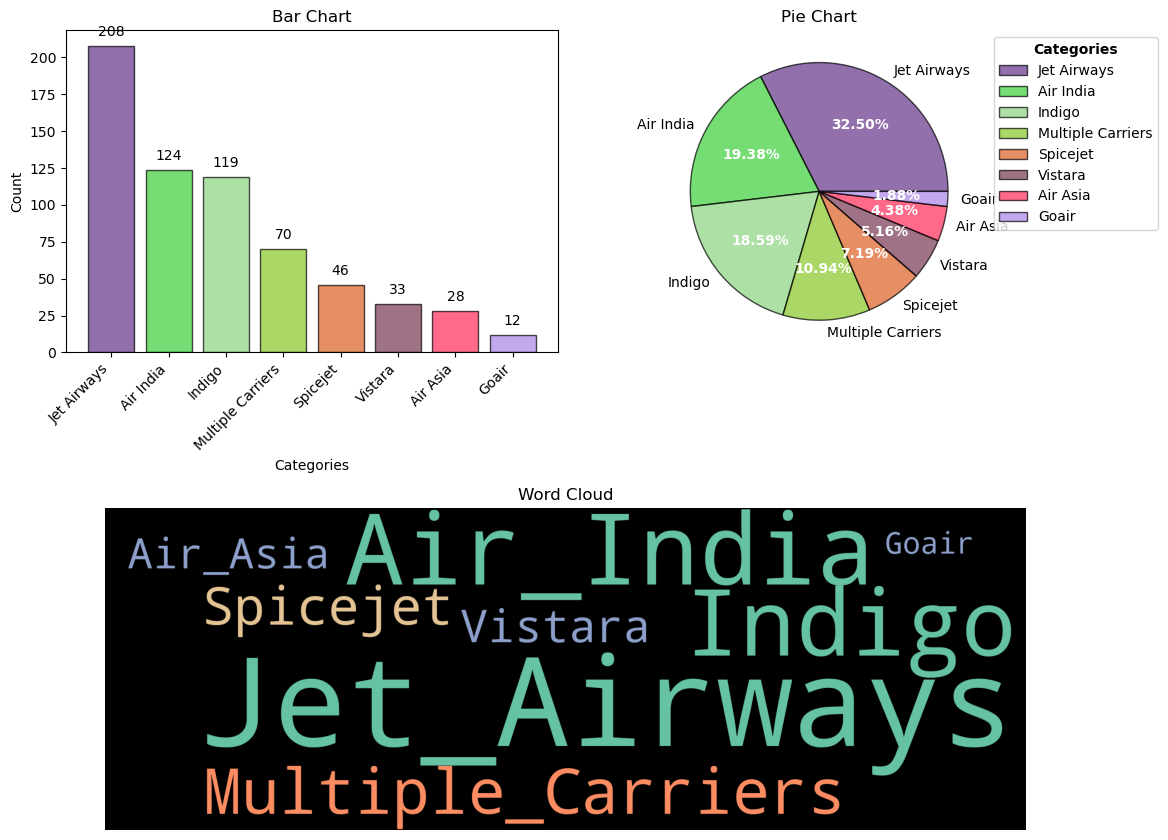

In [18]:
eda_helper_functions.cat_univar_plots(train, "airline")

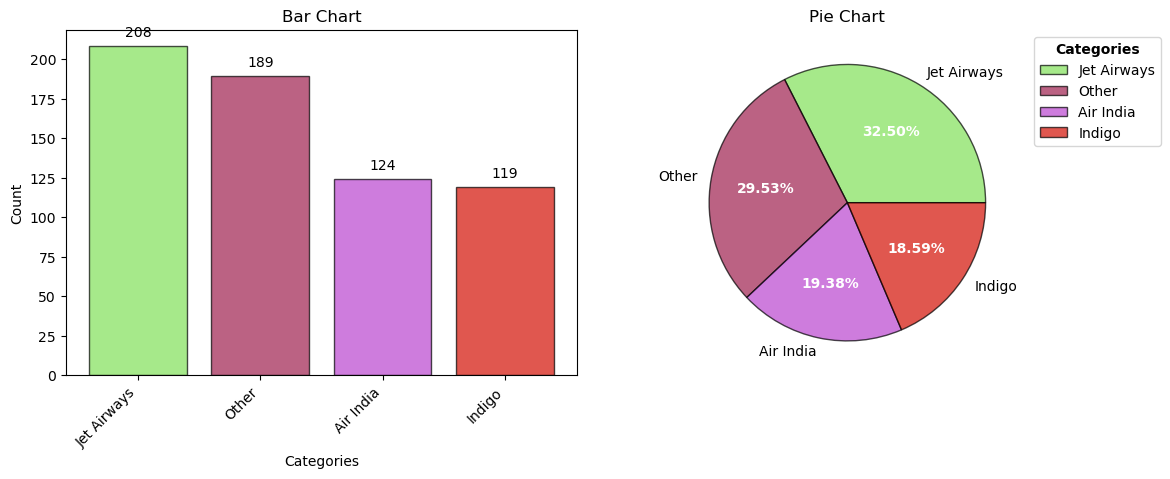

In [19]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

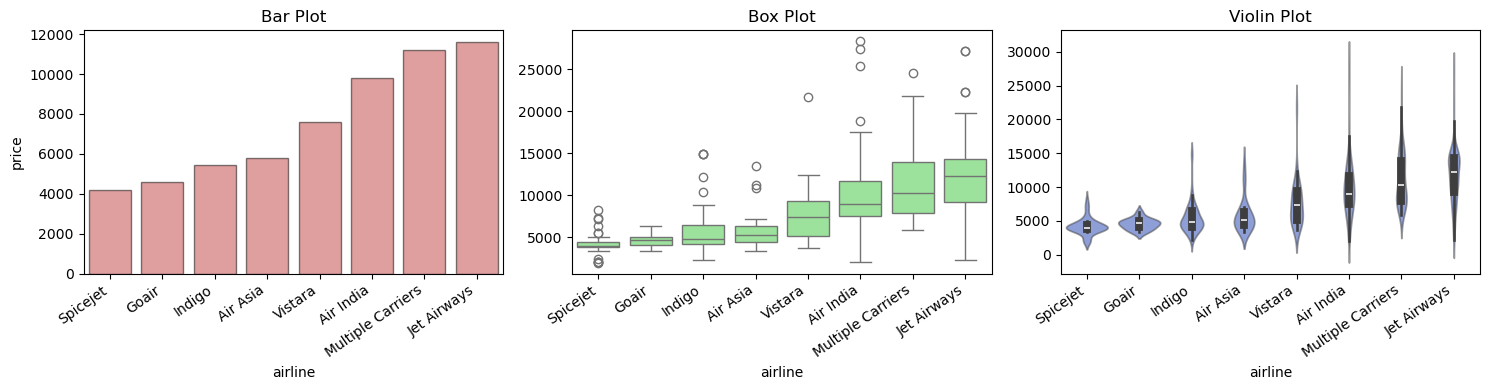

In [20]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [21]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 59.53461115054855
- p-value              : 1.7064592558748328e-65
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 308.58546842744653
- p-value              : 8.86854560039768e-63
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


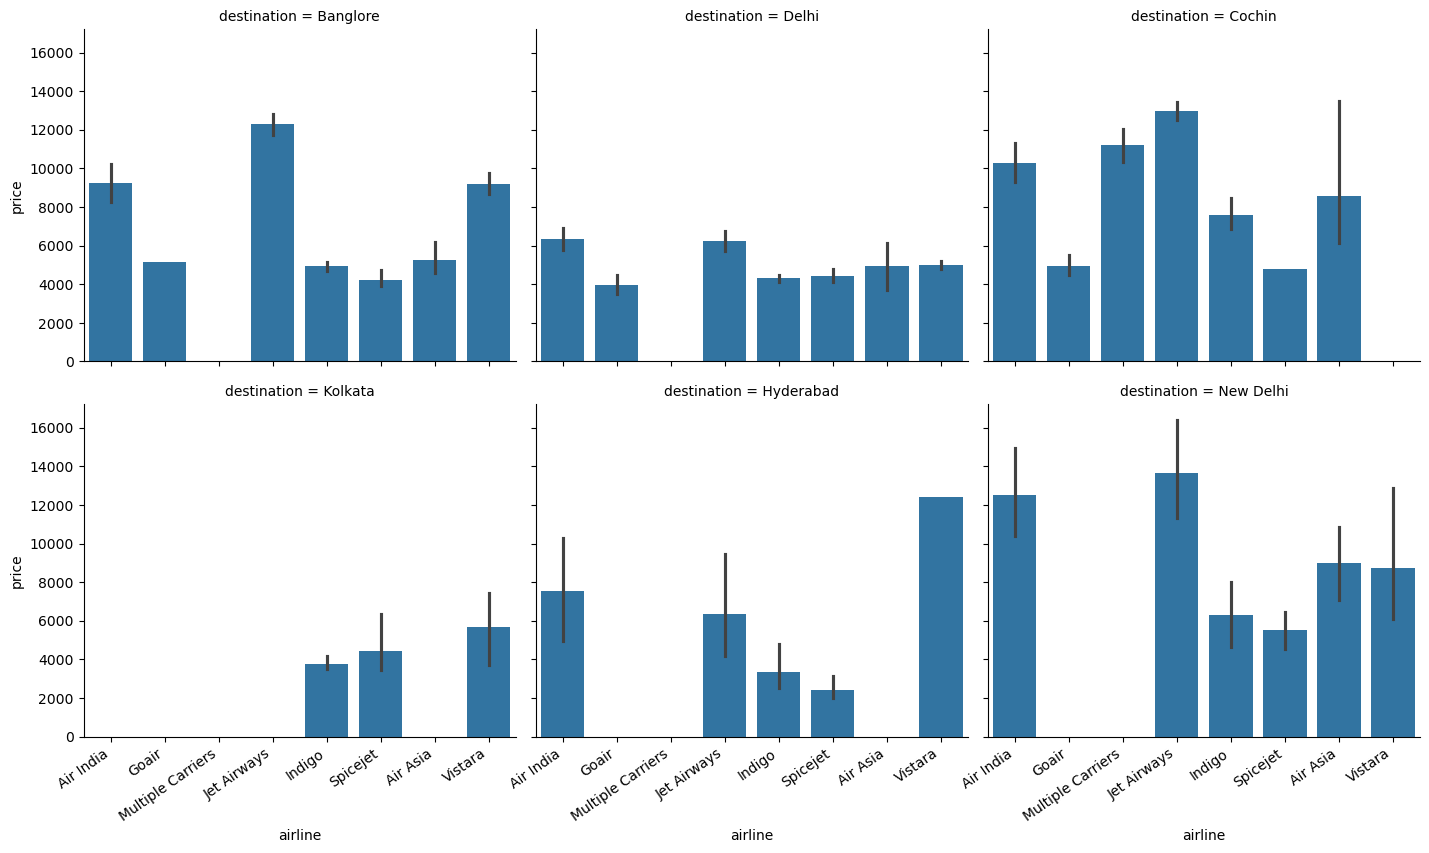

In [22]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

In [23]:
train.date_of_journey

0     2019-06-09
1     2019-06-15
2     2019-03-21
3     2019-05-09
4     2019-04-18
         ...    
635   2019-05-15
636   2019-06-06
637   2019-05-01
638   2019-06-06
639   2019-06-09
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

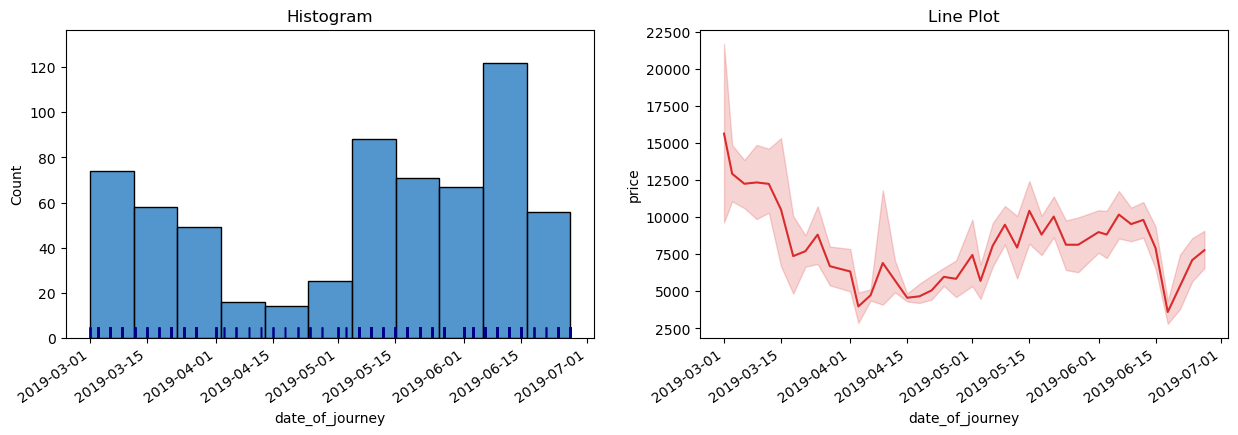

In [24]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

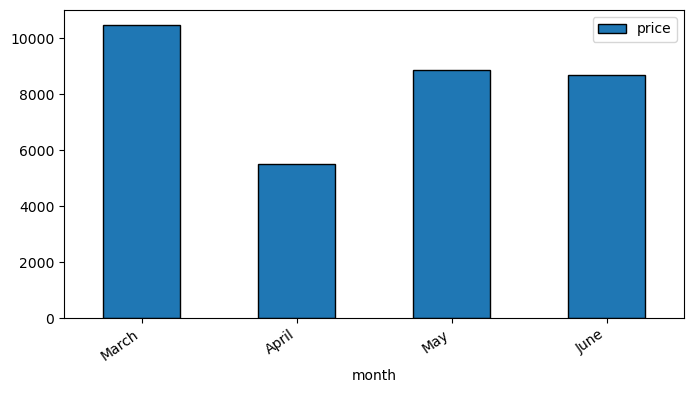

In [25]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

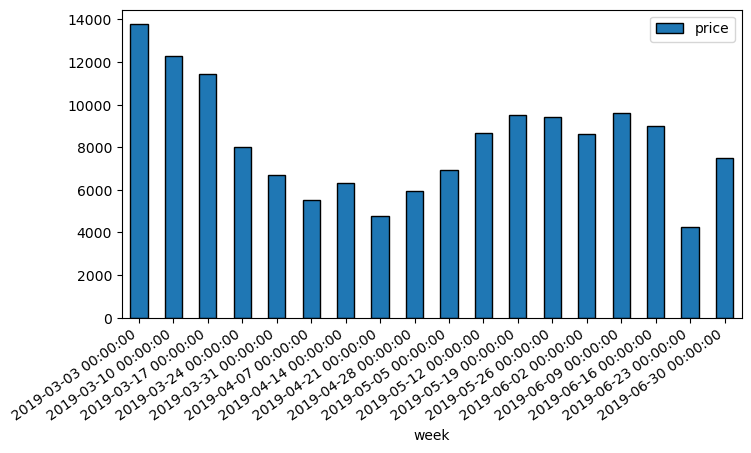

In [26]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

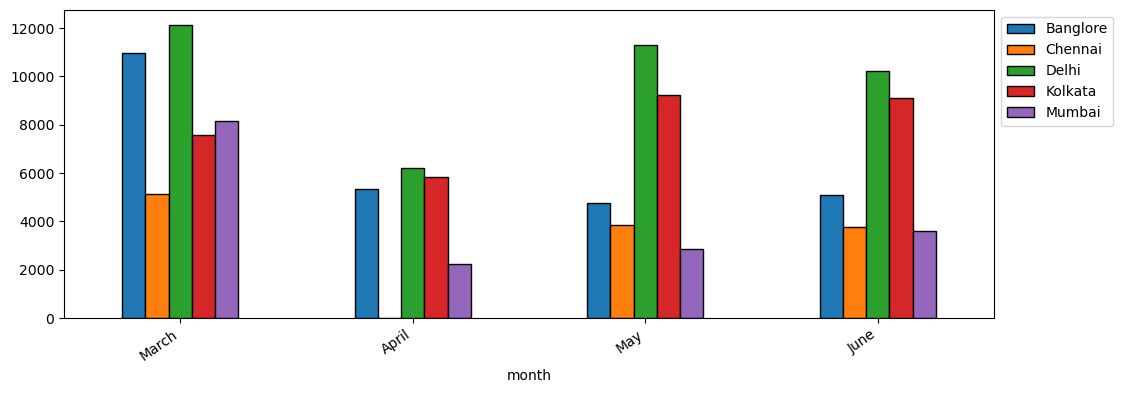

In [27]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

In [28]:
train.dep_time

0     2025-03-21 16:50:00
1     2025-03-21 20:55:00
2     2025-03-21 10:00:00
3     2025-03-21 05:30:00
4     2025-03-21 21:25:00
              ...        
635   2025-03-21 13:00:00
636   2025-03-21 08:00:00
637   2025-03-21 09:00:00
638   2025-03-21 19:30:00
639   2025-03-21 05:30:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

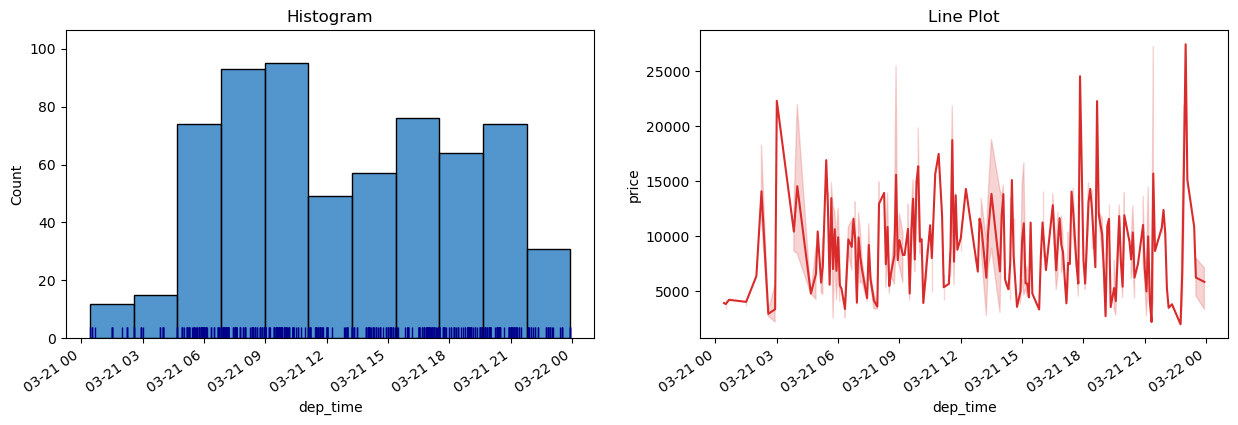

In [29]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

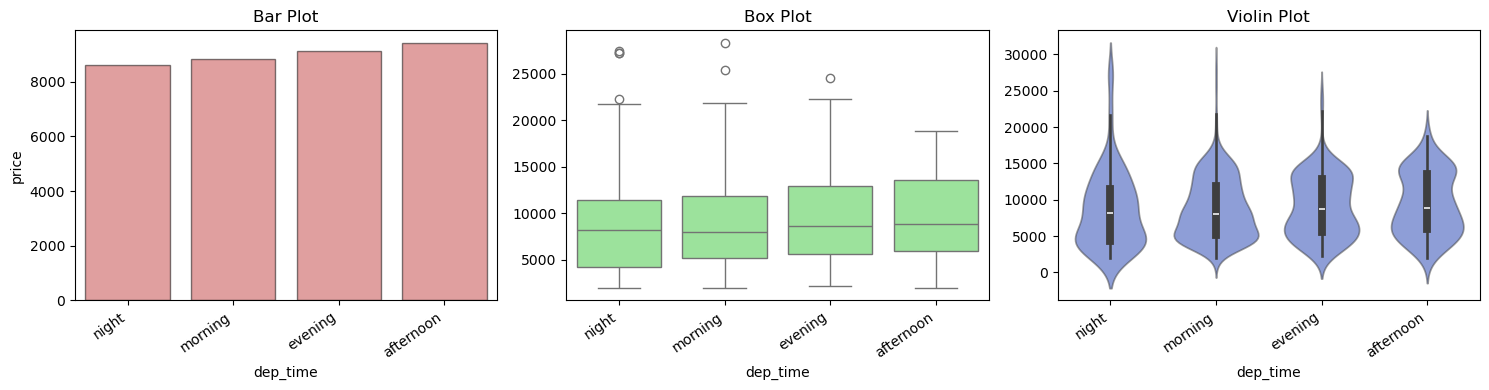

In [30]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)


In [31]:
train.duration

0       765
1       165
2       660
3      1375
4       160
       ... 
635     375
636     675
637     615
638     165
639     425
Name: duration, Length: 640, dtype: int64

In [32]:
eda_helper_functions.num_summary(train, "duration")

0       765
1       165
2       660
3      1375
4       160
       ... 
635     375
636     675
637     615
638     165
639     425
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,150.00
25,170.00
50,505.00
75,910.00
90,1435.50
95,1615.00
99,2243.05


,value
mean,633.664062
trimmed mean (5%),594.973958
trimmed mean (10%),565.908203
median,505.000000


,value
var,266566.483214
std,516.300768
IQR,740.000000
mad,335.000000
coef_variance,0.814786


,value
skewness,0.988389
kurtosis,0.236863


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.428927786283817e-22
Test Statistic       : 0.8769842990241218
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 25.521186691227967
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [33]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.0
0.50    505.0
0.75    910.0
Name: duration, dtype: float64

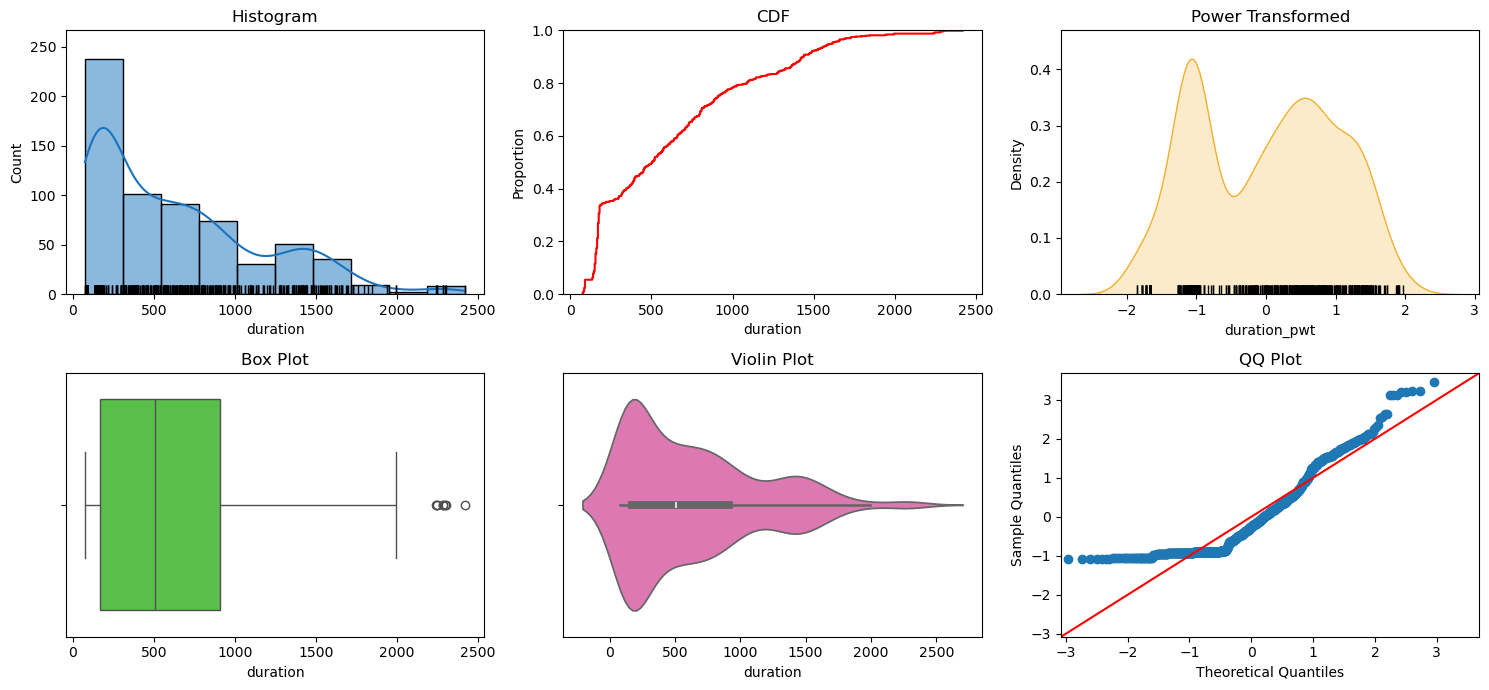

In [34]:
eda_helper_functions.num_univar_plots(train, "duration")

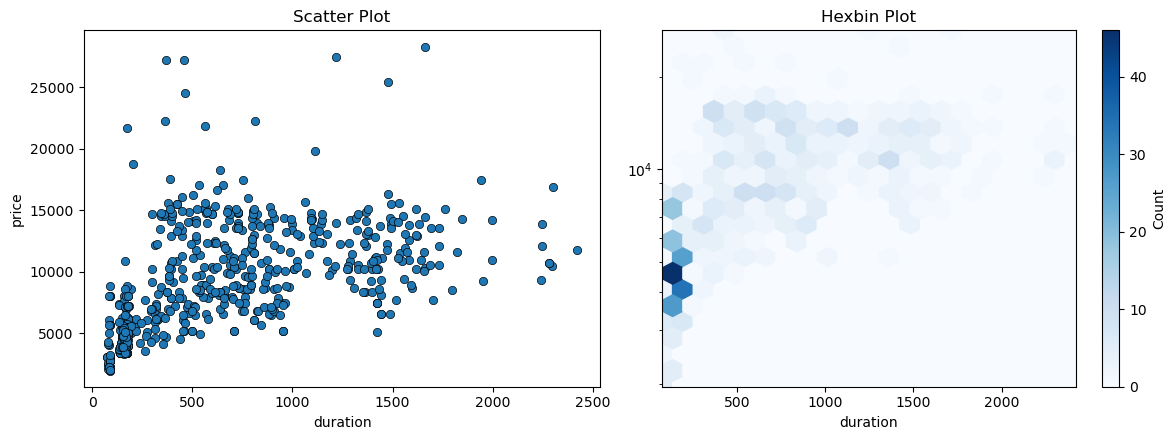

In [35]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [36]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5503938086311596
- p-value              : 5.7762063403369096e-52
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7182709837900886
- p-value              : 1.3581532418183855e-102
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


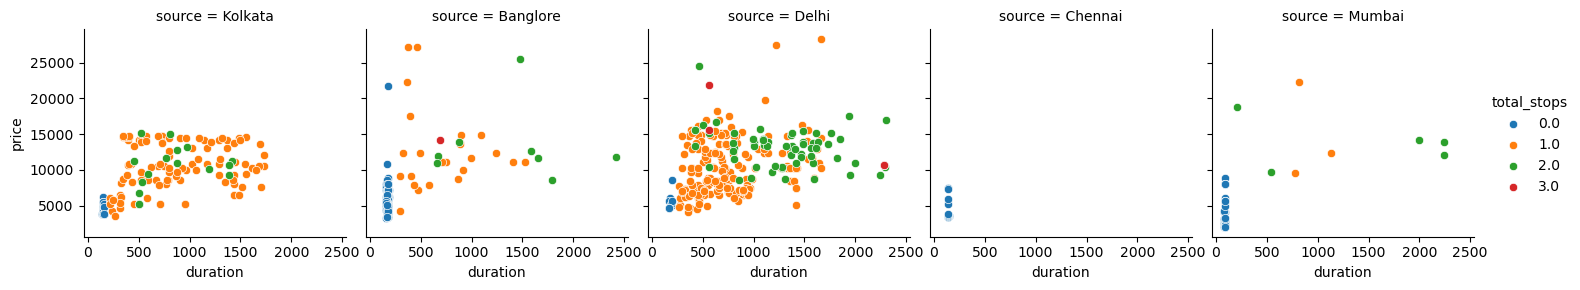

In [37]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

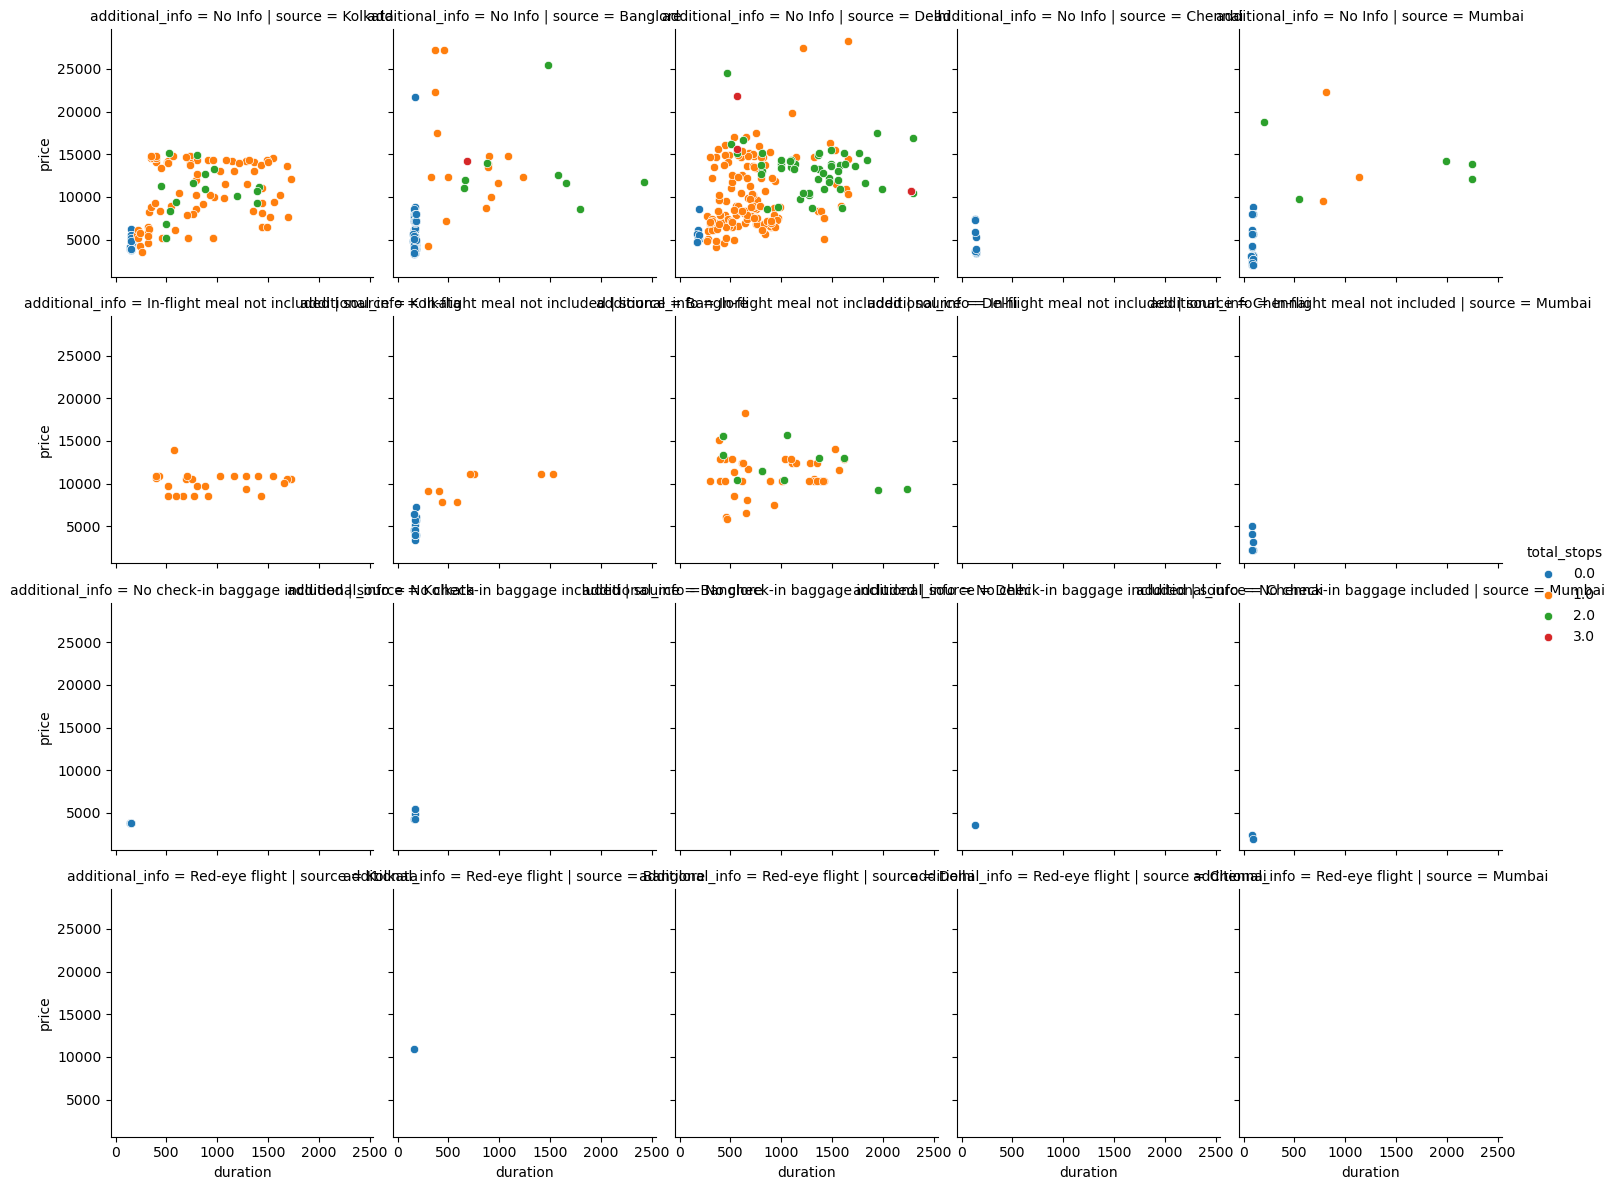

In [38]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [39]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -940.0
Upper Limit : 2020.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
82,Jet Airways,2019-03-21,Delhi,Cochin,2025-03-21 05:30:00,2025-03-21 18:50:00,2240,2.0,In-flight meal not included,9328
137,Air India,2019-03-12,Mumbai,Hyderabad,2025-03-21 06:00:00,2025-03-21 19:25:00,2245,2.0,No Info,12119
548,Air India,2019-03-06,Mumbai,Hyderabad,2025-03-21 06:00:00,2025-03-21 19:25:00,2245,2.0,No Info,13904
413,Air India,2019-05-09,Delhi,Cochin,2025-03-21 05:15:00,2025-03-21 19:15:00,2280,3.0,No Info,10703
618,Air India,2019-05-18,Delhi,Cochin,2025-03-21 05:15:00,2025-03-21 19:15:00,2280,3.0,No Info,10703
54,Air India,2019-05-09,Delhi,Cochin,2025-03-21 05:00:00,2025-03-21 19:15:00,2295,2.0,No Info,10441
52,Jet Airways,2019-03-06,Delhi,Cochin,2025-03-21 05:25:00,2025-03-21 19:45:00,2300,2.0,No Info,16914
479,Air India,2019-03-03,Banglore,New Delhi,2025-03-21 05:50:00,2025-03-21 22:10:00,2420,2.0,No Info,11791


In [40]:
eda_helper_functions.cat_summary(train, "additional_info")

0                          No Info
1                          No Info
2      In-flight meal not included
3      In-flight meal not included
4                          No Info
                  ...             
635                        No Info
636                        No Info
637                        No Info
638                        No Info
639    In-flight meal not included
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,521


,count,percentage
category,,
No Info,521,0.814063
In-flight meal not included,103,0.160938
No check-in baggage included,15,0.023438
Red-eye flight,1,0.001563


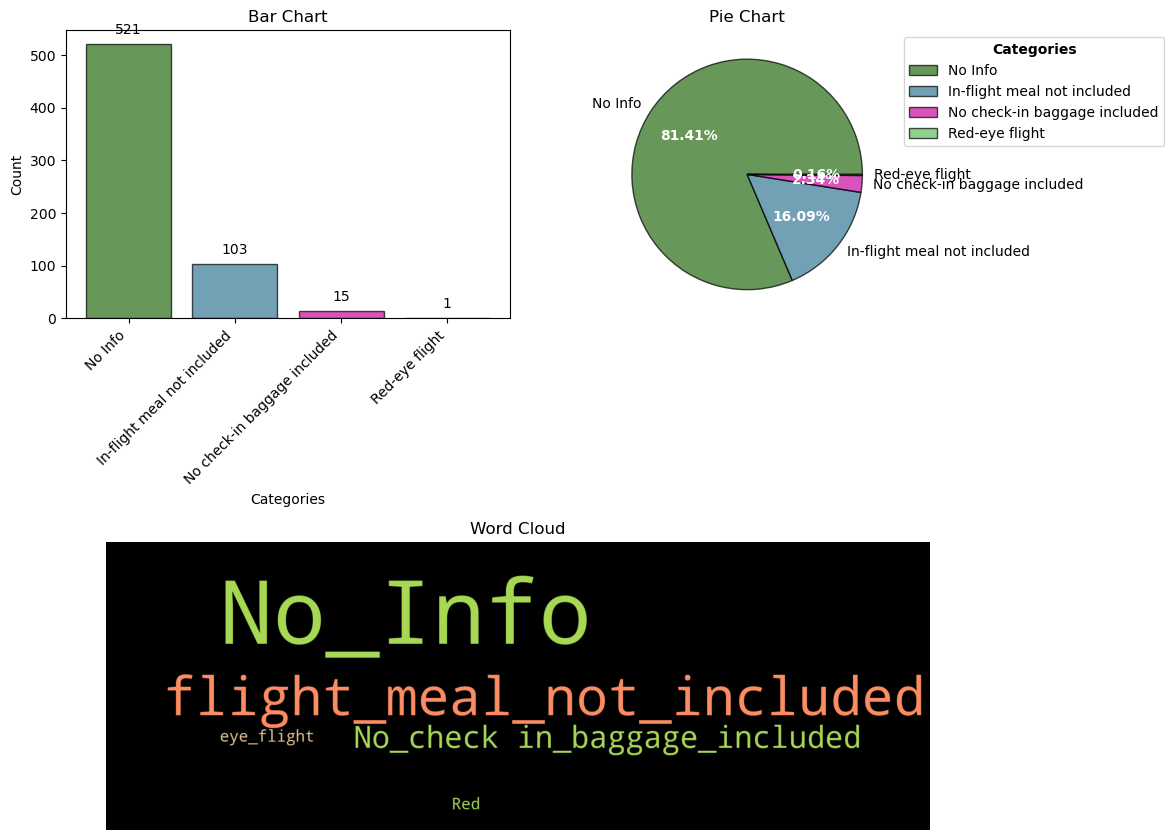

In [41]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

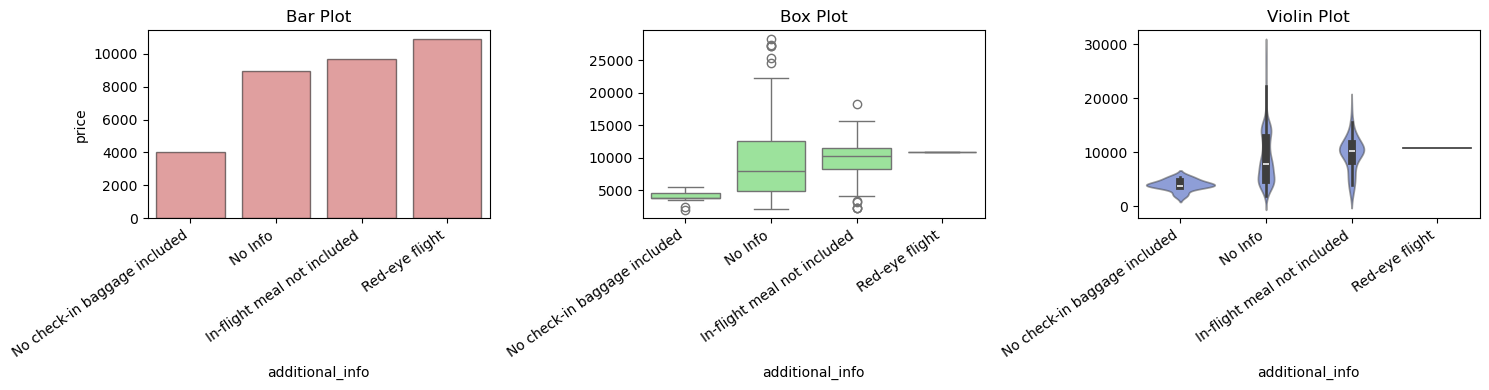

In [42]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

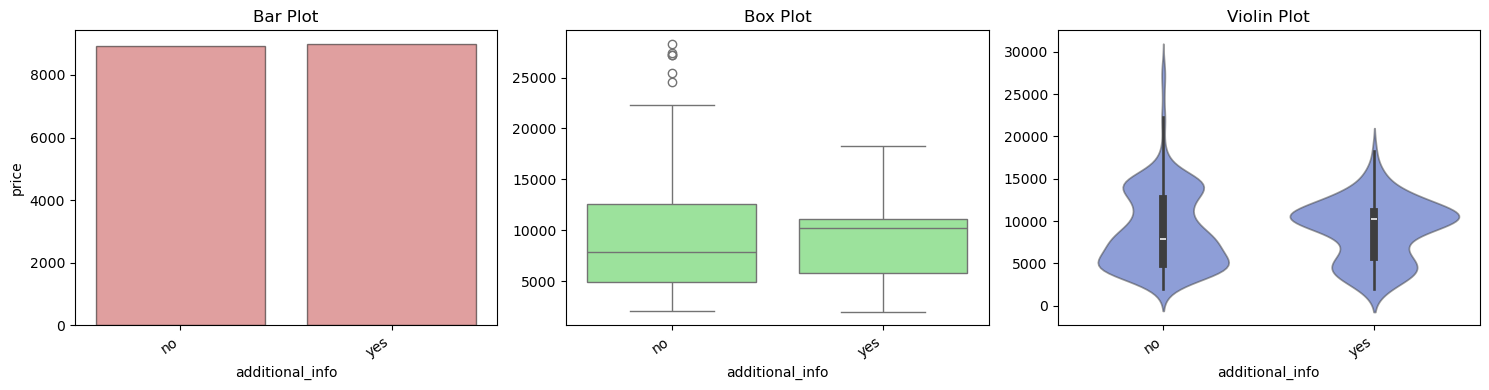

In [43]:
(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)